In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
data = pd.read_csv('s3://aws-logs-161653025481-us-east-1/hour.csv', index_col=0)
data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
data.shape

(17379, 16)

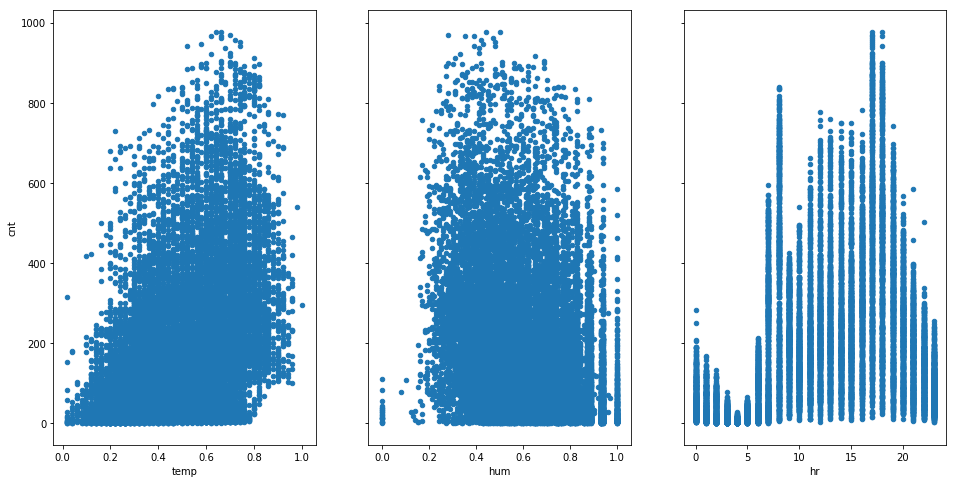

In [7]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='temp', y='cnt', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='hum', y='cnt', ax=axs[1])
data.plot(kind='scatter', x='hr', y='cnt', ax=axs[2])

In [44]:
X=data.drop('cnt', 1).drop('dteday',1).drop('casual',1).drop('registered',1)
y = data.cnt

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print lm.coef_

[  1.98993376e+01   8.10871557e+01  -8.64823317e-03   7.67059663e+00
  -2.18792162e+01   1.87835413e+00   3.93922538e+00  -3.43209756e+00
   7.81497797e+01   2.33157087e+02  -1.98184681e+02   4.15652147e+01]


In [45]:
lm.score(X, y)

0.38885839063003313

Now, let's try statsmodel library

In [31]:
import statsmodels.api as sm

In [48]:
X2=X
X2['Intercept']=1
model = sm.OLS(y, X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Wed, 12 Apr 2017   Prob (F-statistic):               0.00
Time:                        19:30:58   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season        19.8993      1.819     10.941      0.0

In [33]:
data = pd.read_csv('/mnt/tmp/flights/2008.csv', index_col=0)

In [51]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Year,,,,,,,,,,,,,,,,,,,,,
2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [52]:
data2=data[['Distance','DepDelay','ArrDelay','Month','DayOfWeek']]

In [53]:
data2.head()

,Distance,DepDelay,ArrDelay,Month,DayOfWeek
Year,,,,,
2008,810,8.0,-14.0,1,4
2008,810,19.0,2.0,1,4
2008,515,8.0,14.0,1,4
2008,515,-4.0,-6.0,1,4
2008,515,34.0,34.0,1,4


In [54]:
data2=data2.dropna()

In [57]:
X=data2.drop('ArrDelay',1)
y = data2.DepDelay-data2.ArrDelay
y.head()
X.head()
type(X)
type(y)

pandas.core.series.Series

In [62]:
import time

In [63]:

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
start_time = time.time()
lm.fit(X, y)
print("--- %s seconds ---" % (time.time() - start_time))

# print intercept and coefficients
print lm.coef_

--- 2.36560297012 seconds ---
[ 0.00121367 -0.01875574  0.15595712  0.06943981  0.        ]


In [64]:
X2=X
X2['Intercept']=1
model = sm.OLS(y, X2)
start_time = time.time()
results = model.fit()
print("--- %s seconds ---" % (time.time() - start_time))
print(results.summary())

--- 2.80945205688 seconds ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                 1.048e+04
Date:                Thu, 13 Apr 2017   Prob (F-statistic):               0.00
Time:                        16:17:32   Log-Likelihood:            -2.7812e+07
No. Observations:             6855029   AIC:                         5.562e+07
Df Residuals:                 6855024   BIC:                         5.562e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Distance       0.0012 

Now we start to test a large dataset. Airflight data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed. 

In [17]:
# imports
import pandas as pd
data = pd.read_csv('P:/KDD/Airline/2000.csv', encoding = "ISO-8859-1")
one_hot=pd.get_dummies(data['UniqueCarrier'])
data1=data[['Distance','DepDelay','ArrDelay','Month','DayOfWeek']]
data1=data1.join(one_hot)
data1=data1.dropna()
data1['y']=data1.DepDelay-data1.ArrDelay

In [19]:
data1.head()

,Distance,DepDelay,ArrDelay,Month,DayOfWeek,AA,AQ,AS,CO,DL,HP,NW,TW,UA,US,WN,y
0,1587,0.0,7.0,1,5,0,0,0,0,0,1,0,0,0,0,0,-7.0
1,1587,1.0,40.0,1,6,0,0,0,0,0,1,0,0,0,0,0,-39.0
3,1587,-2.0,-7.0,1,1,0,0,0,0,0,1,0,0,0,0,0,5.0
4,1587,-4.0,-4.0,1,6,0,0,0,0,0,1,0,0,0,0,0,0.0
5,1587,3.0,47.0,1,7,0,0,0,0,0,1,0,0,0,0,0,-44.0


In [3]:
num=1
print('P:/KDD/Airline/200%d.csv' % num)

P:/KDD/Airline/2001.csv


In [6]:
# imports
for num in range(1, 4):
    data = pd.read_csv('P:/KDD/Airline/200%d.csv' % num,   encoding = "ISO-8859-1")
    one_hot=pd.get_dummies(data['UniqueCarrier'])
    data3=data[['Distance','DepDelay','ArrDelay','Month','DayOfWeek']]
    data3=data3.dropna()
    data3['y']=data3.DepDelay-data3.ArrDelay
    data3=data3.join(one_hot)
    frames = [data1,data3]
    data1 = pd.concat(frames)

C:\Users\zihao.zhang\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
data1.to_csv("2000-2004.csv")

In [8]:
data1.head()

,Distance,DepDelay,ArrDelay,Month,DayOfWeek,y
0,1587,0.0,7.0,1,5,-7.0
1,1587,1.0,40.0,1,6,-39.0
3,1587,-2.0,-7.0,1,1,5.0
4,1587,-4.0,-4.0,1,6,0.0
5,1587,3.0,47.0,1,7,-44.0


In [20]:
import time
X=data1.drop('ArrDelay',1).drop('y',1)
y=data1.y
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
start_time = time.time()
lm.fit(X, y)
print("--- %s seconds ---" % (time.time() - start_time))
# print intercept and coefficients
print (lm.coef_)

--- 5.573693513870239 seconds ---
[  1.45754030e-03   3.19706973e-02  -4.35247400e-02   1.18244424e-01
   3.32706482e-01  -1.11861875e-01  -5.83453811e-01   8.55110700e-01
   6.38629228e-01  -1.31712612e+00   1.34851091e+00  -1.28195371e-01
  -1.93503635e+00  -1.05271895e+00   1.95343516e+00]


In [21]:
import statsmodels.api as sm
X2=X
X2['Intercept']=1
model = sm.OLS(y, X2)
start_time = time.time()
results = model.fit()
print("--- %s seconds ---" % (time.time() - start_time))
print(results.summary())

--- 5.987483263015747 seconds ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     4970.
Date:                Thu, 13 Apr 2017   Prob (F-statistic):               0.00
Time:                        17:16:52   Log-Likelihood:            -2.2915e+07
No. Observations:             5481303   AIC:                         4.583e+07
Df Residuals:                 5481288   BIC:                         4.583e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Distance       0.0